In [1]:
import pandas as pd
import numpy as np
import requests
import urllib.parse
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
def download_data():
    url = 'http://infra.datos.gob.ar/catalog/sspm/dataset/168/distribution/168.1/download/datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv'
    r = requests.get(url)
    with open('datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv', 'wb') as f:
        f.write(r.content)

In [3]:
download_data()
datos = pd.read_csv("datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv")

display(datos.shape)

df = pd.DataFrame({
    'fecha': datos['indice_tiempo'],
    'valor': datos['tipo_cambio_a3500'],
})

display(df.isna().sum())
display(df.isnull().sum())
display(df)

(7911, 18)

fecha    0
valor    0
dtype: int64

fecha    0
valor    0
dtype: int64

,fecha,valor
0,2002-03-05,1.9917
1,2002-03-06,2.0508
2,2002-03-07,2.1375
3,2002-03-08,2.2033
4,2002-03-09,2.2033
...,...,...
7906,2023-10-27,350.0083
7907,2023-10-28,350.0083
7908,2023-10-29,350.0083
7909,2023-10-30,350.0250


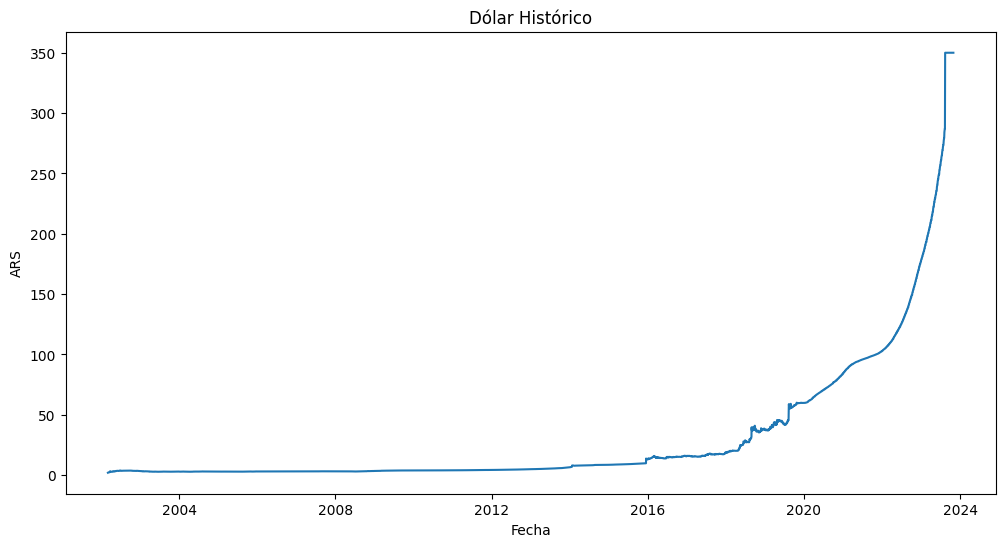

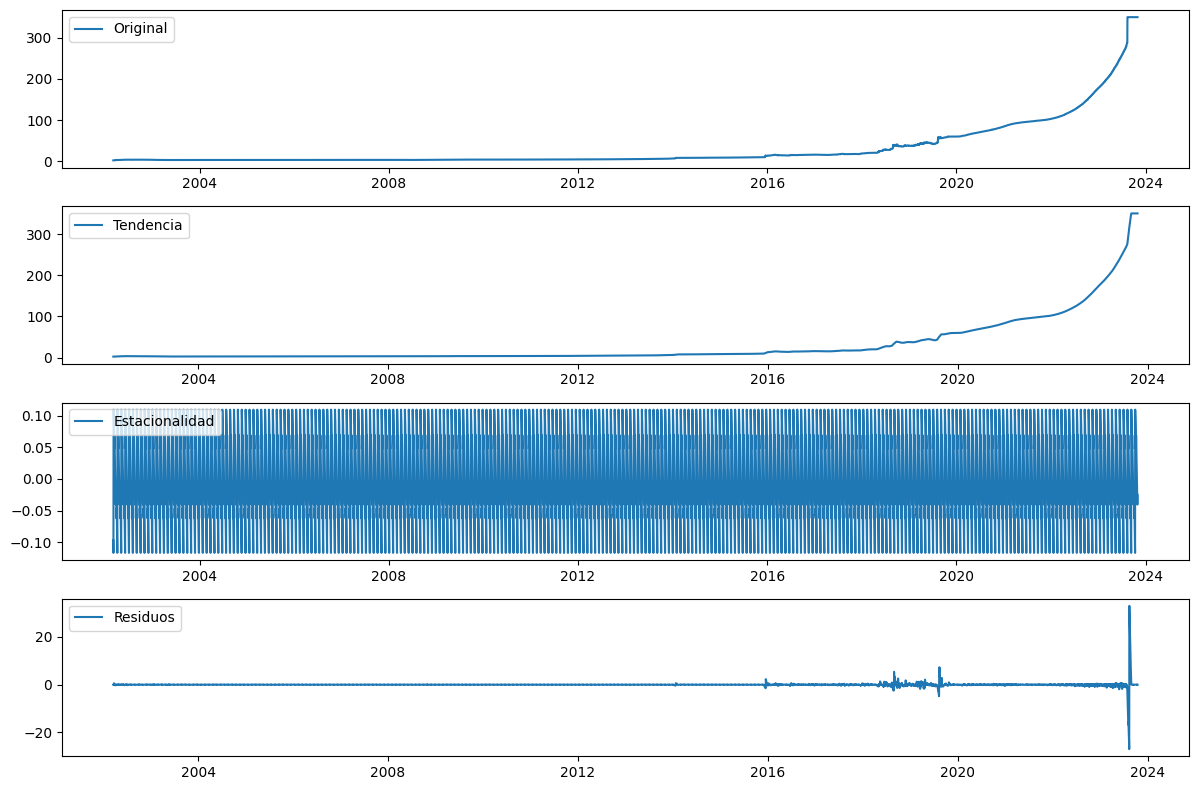

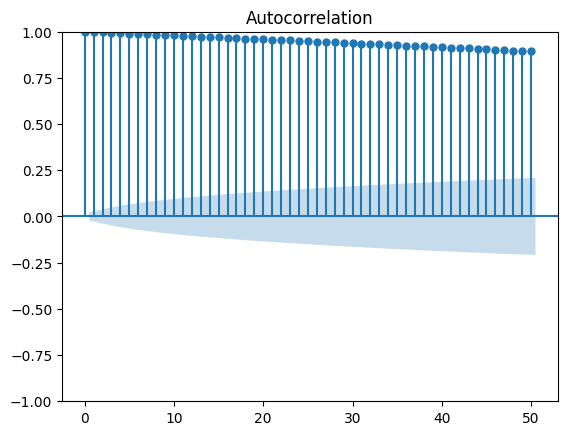

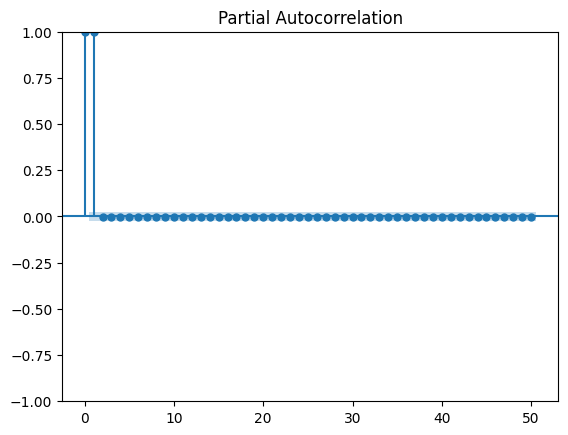

C:\Users\yml44\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yml44\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yml44\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yml44\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\yml44\AppData\Roaming\Python\Python311\site-packa

                               SARIMAX Results                                
Dep. Variable:                  valor   No. Observations:                 7911
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8821.373
Date:                Sun, 03 Dec 2023   AIC                          17648.746
Time:                        13:55:51   BIC                          17669.673
Sample:                    03-05-2002   HQIC                         17655.913
                         - 10-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.001    735.125      0.000       0.997       1.003
ma.L1         -0.9937      0.003   -314.333      0.000      -1.000      -0.988
sigma2         0.5446      0.001    692.155      0.0

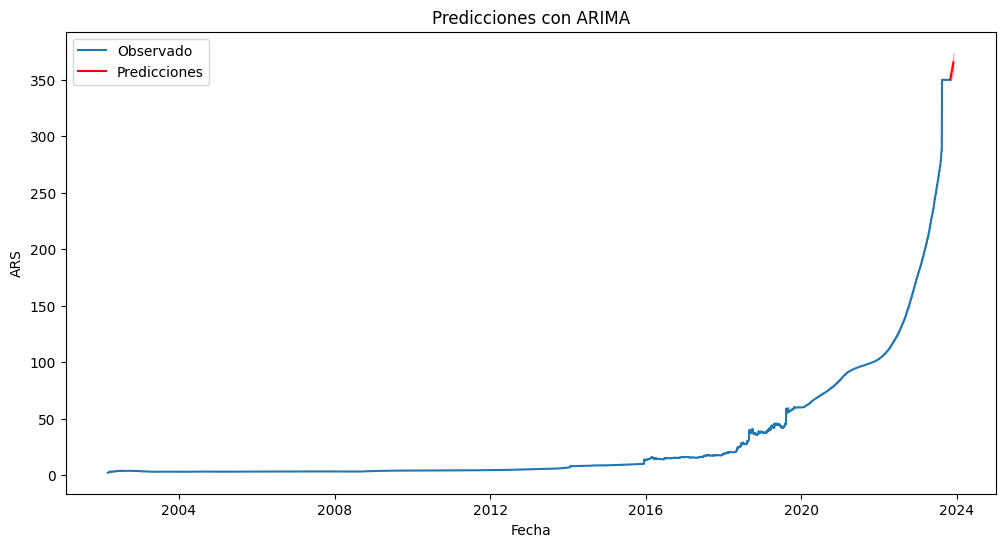

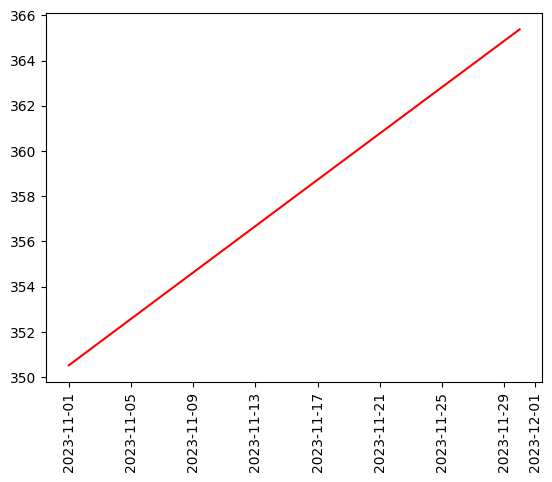

In [4]:
df['fecha'] = pd.to_datetime(df['fecha'])

df.set_index('fecha', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df['valor'])
plt.title('Dólar Histórico')
plt.xlabel('Fecha')
plt.ylabel('ARS')
plt.show()

# Descomposición de la serie temporal
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['valor'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['valor'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuos')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Funciones de Autocorrelación y Autocorrelación Parcial
plot_acf(df['valor'], lags=50)
plot_pacf(df['valor'], lags=50)
plt.show()

model = ARIMA(df['valor'], order=(1, 1, 1))
results = model.fit()

# Resumen del modelo
print(results.summary())

# Predicciones próximos 30 días
forecast_steps = 30
forecast = results.get_forecast(steps=forecast_steps)

# Intervalo de confianza de las predicciones
forecast_ci = forecast.conf_int()

# gráfico predicciones
plt.figure(figsize=(12, 6))
plt.plot(df['valor'], label='Observado')
plt.plot(forecast.predicted_mean, color='red', label='Predicciones')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='red', alpha=0.2)
plt.title('Predicciones con ARIMA')
plt.xlabel('Fecha')
plt.ylabel('ARS')
plt.legend()
plt.show()

plt.plot(forecast.predicted_mean, color='red')
plt.xticks(rotation=90)
plt.show()
